<a href="https://colab.research.google.com/github/angel4sara/ICT-Assignments/blob/main/Regression_Assisgnmnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question

 The given dataset contains the price of a second-hand Hyundai grand i10 car
 with respect to year of making.
 1. Find the best linear relationship between year
 and price.
 2. Can you predict the possible price of a 2022 model second-hand
 grand i10?
 3. Please learn about lasso regression and create a model along with linear
 regression. Find out which one is performing better

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Reading the Dataset

In [2]:
data = pd.read_csv('/content/car_age_price.csv')

## Understanding data

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


### Number of Rows and Columns

In [4]:
data.shape

(112, 2)

- 112 rows × 2 columns.

### General Info (Datatypes, Missing Values)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


- No null values.

### Statistical Info

In [6]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


## Correlation

### HeatMap

In [7]:
corr_mx = data.corr()

Text(0.5, 1.0, 'Correlation Between Year and Price')

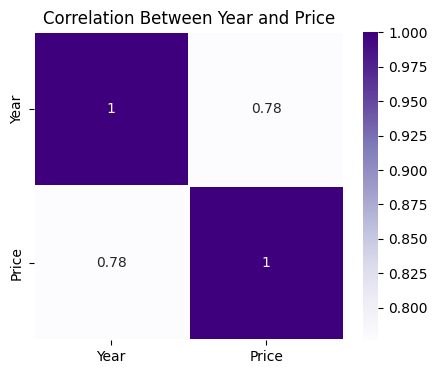

In [8]:
plt.subplots(figsize = (5,4))
sns.heatmap(corr_mx, linewidths = 0.2, annot = True, cmap = 'Purples')
plt.title('Correlation Between Year and Price')

### Scatter Plot

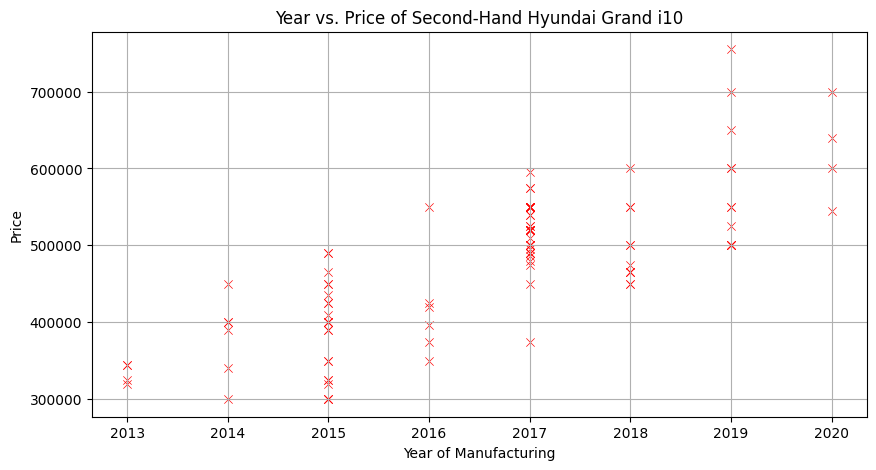

In [9]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = data['Year'], y = data['Price'], color ='red', marker = 'x')
plt.title('Year vs. Price of Second-Hand Hyundai Grand i10')
plt.xlabel('Year of Manufacturing')
plt.ylabel('Price')
plt.grid(True)
plt.show()

- As the car gets older it's price decreases.

## Splitting the data

In [10]:
X = data[['Year']]   #Feature
y = data.drop(['Year'], axis = 1)  #Target

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

- 80% Training Set
- 20% Testing Set

## Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()

linear_model.fit(X_train, y_train)

LinearRegression()

In [13]:
y_pred_linear = linear_model.predict(X_test)

In [14]:
y_pred_linear

array([[600775.91252081],
       [505558.77690466],
       [553167.34471273],
       [553167.34471273],
       [553167.34471273],
       [410341.6412885 ],
       [505558.77690466],
       [553167.34471273],
       [600775.91252081],
       [600775.91252081],
       [315124.50567235],
       [505558.77690466],
       [410341.6412885 ],
       [648384.48032889],
       [553167.34471273],
       [600775.91252081],
       [315124.50567235],
       [410341.6412885 ],
       [505558.77690466],
       [505558.77690466],
       [505558.77690466],
       [505558.77690466],
       [505558.77690466]])

### Metrics

In [15]:
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

In [17]:
mse_linear

4326906256.829671

In [18]:
r2_linear

0.36759313425902185

## Lasso Regression

In [19]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [20]:
y_pred_lasso = lasso_model.predict(X_test)

In [21]:
y_pred_lasso

array([600775.81201603, 505558.75884159, 553167.28542881, 553167.28542881,
       553167.28542881, 410341.70566715, 505558.75884159, 553167.28542881,
       600775.81201603, 600775.81201603, 315124.65249272, 505558.75884159,
       410341.70566715, 648384.33860324, 553167.28542881, 600775.81201603,
       315124.65249272, 410341.70566715, 505558.75884159, 505558.75884159,
       505558.75884159, 505558.75884159, 505558.75884159])

### Metrics

In [22]:
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [23]:
mse_lasso

4326901608.19506

In [24]:
r2_lasso

0.36759381368868127

## Comparison

In [25]:
model_performance = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression'],
    'MSE': [mse_linear, mse_lasso],
    'R Squared Score': [r2_linear, r2_lasso]
})

In [26]:
model_performance

,Model,MSE,R Squared Score
0,Linear Regression,4.326906e+09,0.367593
1,Lasso Regression,4.326902e+09,0.367594


- The Lasso Regression performs slightly better with a marginally lower MSE and higher R² score, indicating a better fit

## Prediction : 2022 Price

### The Best Method

In [27]:
best_model = linear_model if r2_linear > r2_lasso else lasso_model

predicted_price = best_model.predict([[2022]])[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [28]:
print(f'The price of a 2022 model second-hand grand i10 is {predicted_price:.2f}')

The price of a 2022 model second-hand grand i10 is 743601.39


### Both Methods

In [29]:
year_2022 = [[2022]]

price_lin_2022 = linear_model.predict(year_2022)[0]
price_lasso_2022 = lasso_model.predict(year_2022)[0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [30]:
print(f'The price of a 2022 model second-hand grand i10 using linear model is {price_lin_2022[0]:.2f}')

The price of a 2022 model second-hand grand i10 using linear model is 743601.62


In [31]:
print(f'The price of a 2022 model second-hand grand i10 using lasso model is {price_lasso_2022:.2f}')

The price of a 2022 model second-hand grand i10 using lasso model is 743601.39


## Best Fit Line

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


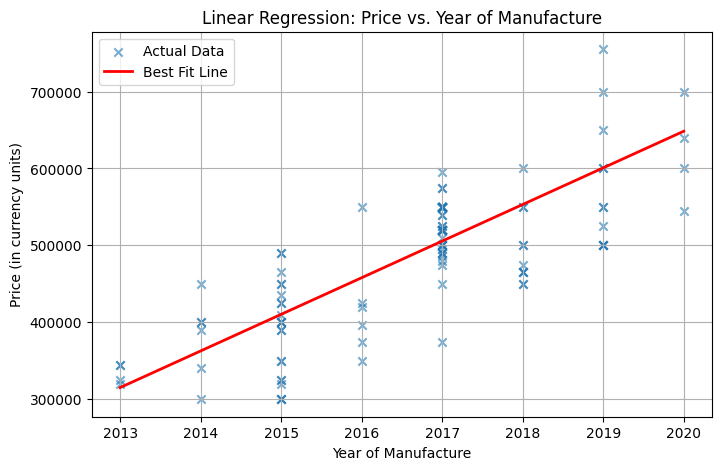

In [32]:
# Predict prices for visualization
years_range = np.linspace(data['Year'].min(), data['Year'].max(), 100).reshape(-1, 1)
predicted_prices = linear_model.predict(years_range)


plt.figure(figsize=(8, 5))
plt.scatter(data['Year'], data['Price'], alpha=0.6, label='Actual Data', marker = 'x')
plt.plot(years_range, predicted_prices, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (in currency units)')
plt.title('Linear Regression: Price vs. Year of Manufacture')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


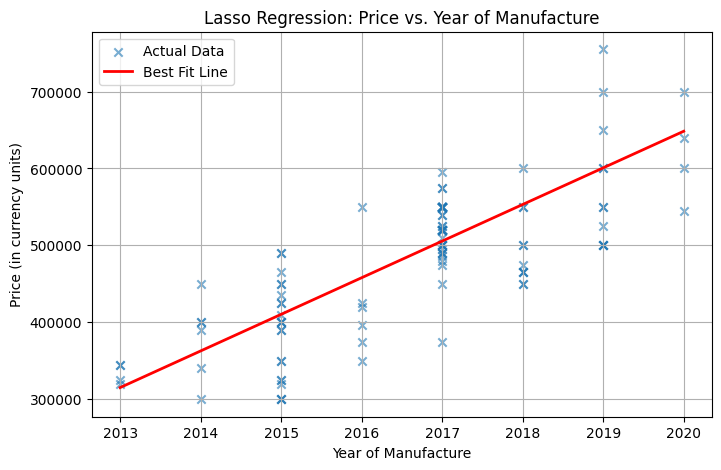

In [33]:
# Predict prices for visualization
years_range = np.linspace(data['Year'].min(), data['Year'].max(), 100).reshape(-1, 1)
predicted_prices = lasso_model.predict(years_range)


plt.figure(figsize=(8, 5))
plt.scatter(data['Year'], data['Price'], alpha=0.6, label='Actual Data', marker = 'x')
plt.plot(years_range, predicted_prices, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('Year of Manufacture')
plt.ylabel('Price (in currency units)')
plt.title('Lasso Regression: Price vs. Year of Manufacture')
plt.legend()
plt.grid(True)
plt.show()
